# Numerical Solution of Ramsey/Cass-Koopmans model
## Mateo Velásquez-Giraldo (adapted from Alexander Tabarrok and Chris Carroll)

This notebook implements a class representing Ramsey's growth model. Current utilities include:
- Numerically finding the consumption rule through 'time elimination', as implemented by Alexander Tabarrok and Chris Carroll's [Wolfram Mathematica notebook](www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Growth/RamseyNumericSolve.zip).
- Drawing the phase diagram of the model.

A formal treatment of the exact version of the model implemented in this notebook can be found in [Chris Carroll's graduate macroeconomics lecture notes](http://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Growth/RamseyCassKoopmans/).


In [3]:
# Preamble and class implementation
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy import interpolate

# Plot formatting
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

class RCKmod:
    
    # Initialize model
    def __init__(self,rho,alpha,theta,xi,delta,phi):
        
        # Assign parameter values
        self.rho = rho
        self.alpha = alpha
        self.theta = theta
        self.xi = xi
        self.delta = delta
        self.phi = phi
        
        # Maximum capital
        self.kmax = (1/(self.phi + self.xi + self.delta))**(1/(1-self.alpha))
        
        # Steady state capital
        self.kss = (alpha/(theta + xi + delta + rho*phi))**(1/(1-alpha))
        # Steady state consumption
        self.css = self.kss**alpha - (xi + delta + phi)*self.kss
    
    # Dynamic equation without time
    def dcdk(self,y,t):
        c = y
        k =t
        
        dc = c/self.rho*(self.alpha*k**(self.alpha - 1) - self.theta - (self.xi + self.delta) -self.rho*self.phi)
        dk = k**self.alpha - c - (self.phi + self.xi + self.delta)*k
        
        return(dc/dk)
    
    # Solves for the consumption rule through the time eilimination
    # method.
    def solve(self, eps = 10**(-5), npoints = 400):
        
        # K ranges
        k_below = np.linspace(self.kss,0.0001,npoints)
        k_above = np.linspace(self.kss,self.kmax,npoints)
        k = np.concatenate((k_below,k_above)).flatten()
         
        # Solve for c
        c_below = odeint(model.dcdk, self.css - eps, k_below)
        c_above = odeint(model.dcdk, self.css + eps, k_above)
        c = np.concatenate((c_below,c_above)).flatten()
        
        self.cFunc = interpolate.interp1d(k,c)
    
    # Returns the consumption value that leaves a given ammount of
    # effective capital unchanged.
    def k0locus(self,k):
        return(k**self.alpha - (self.phi + self.xi + self.delta)*k)
        
    # Plots the model's phase diagram
    def phase_diagram(self, npoints = 200):
        
        k = np.linspace(0.01,self.kmax,npoints)
        
        # Plot k0 locus
        plt.plot(k,self.k0locus(k),label = '$\\dot{k}=0$ locus')
        # Plot c0 locus
        plt.axvline(x = self.kss,linestyle = '--', label = '$\\dot{c}=0$ locus')
        # Plot saddle path
        plt.plot(k,self.cFunc(k), label = 'Saddle path')
        # Plot steady state
        plt.plot(self.kss,self.css,'*r', label = 'Steady state')
        
        # Labels
        plt.title('Phase diagram and consumption rule\n(normalized by efficiency units)')
        plt.xlabel('k')
        plt.ylabel('c')
        
        plt.legend()
        plt.show()

## Example

I now present a quick example of how the class is used.

An instance of the model is created by assigning the required parameter values.

The model needs to be solved in order to find the consumption rule or 'saddle path'.

The model's phase diagram can then be generated.

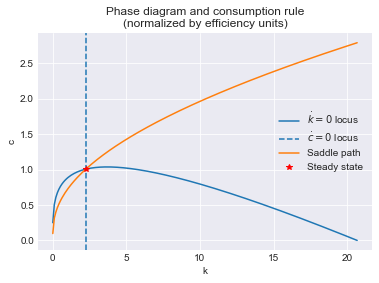

In [2]:
model = RCKmod(rho = 2,alpha = 0.3,theta = 0.02,xi = 0.01,delta = 0.08,phi = 0.03)
model.solve()
model.phase_diagram()